## 1.データセットを統合する

In [2]:
import pandas as pd
import os

# 各都道府県のファイルパスをリストにする
file_paths = [
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/41.csv',
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/42.csv',
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/43.csv',
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/44.csv',
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/45.csv',
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/46.csv',
    '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/47.csv'
]

# 各ファイルを読み込んで連結する
dataframes = [pd.read_csv(file_path, low_memory=False) for file_path in file_paths]
concatenated_data = pd.concat(dataframes, ignore_index=True)

# データセットに含まれる行の数を確認
num_rows = concatenated_data.shape[0]
print(f"データセットに含まれる行の数: {num_rows}")

# 連結データを保存する
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
concatenated_data_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47.csv')
concatenated_data.to_csv(concatenated_data_path, index=False)

print(f"連結データを保存しました: {concatenated_data_path}")


データセットに含まれる行の数: 18603
連結データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47.csv


## headを確認する

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47.csv'
train_df = pd.read_csv(data_path, low_memory=False)

# データの確認
train_df.head()


,ID,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,41002533,中古マンション等,不動産取引価格情報,NaN,41201,佐賀県,佐賀市,兵庫北,佐賀,25,...,NaN,NaN,NaN,２中住専,60.0,200.0,2022年第2四半期,未改装,NaN,7.342423
1,41014398,中古マンション等,成約価格情報,NaN,41203,佐賀県,鳥栖市,宿町,鳥栖,22,...,NaN,NaN,NaN,１種住居,NaN,NaN,2022年第2四半期,NaN,NaN,7.079181
2,41004872,中古マンション等,不動産取引価格情報,NaN,41201,佐賀県,佐賀市,松原,佐賀,26,...,NaN,NaN,NaN,商業,80.0,400.0,2010年第3四半期,未改装,NaN,6.857332
3,41004239,中古マンション等,不動産取引価格情報,NaN,41201,佐賀県,佐賀市,神野東,佐賀,8,...,NaN,NaN,NaN,２種住居,60.0,200.0,2010年第1四半期,改装済み,NaN,7.255273
4,41010432,中古マンション等,不動産取引価格情報,NaN,41202,佐賀県,唐津市,西城内,唐津,9,...,NaN,NaN,NaN,１種住居,60.0,200.0,2019年第2四半期,改装済み,NaN,7.113943


## 2.欠損値の数と割合を確認する

In [4]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 欠損値の数と割合を確認するコード
missing_values_count = train_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(train_data)) * 100

missing_values_summary = pd.DataFrame({
    '欠損値の数': missing_values_count,
    '欠損値の割合 (%)': missing_values_percentage
})

# 欠損値がある列のみ表示
missing_values_summary = missing_values_summary[missing_values_summary['欠損値の数'] > 0]
missing_values_summary.sort_values(by='欠損値の数', ascending=False, inplace=True)

print(missing_values_summary)


            欠損値の数  欠損値の割合 (%)
地域          18603  100.000000
延床面積（㎡）     18603  100.000000
間口          18603  100.000000
土地の形状       18603  100.000000
前面道路：種類     18603  100.000000
前面道路：幅員（ｍ）  18603  100.000000
前面道路：方位     18603  100.000000
取引の事情等      18065   97.107993
今後の利用目的      9710   52.195882
用途           5580   29.995162
建ぺい率（％）      5285   28.409396
容積率（％）       5285   28.409396
改装           4539   24.399290
都市計画         3059   16.443584
最寄駅：距離（分）    2535   13.626834
最寄駅：名称       2259   12.143203
建築年          1873   10.068269
建物の構造        1033    5.552868
間取り           588    3.160781
地区名            55    0.295651


## 3. 特徴量を指定して削除する

In [5]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 特徴量を指定して削除
columns_to_drop = [
    '地域', '間口', '土地の形状', '前面道路：種類', '種類', '都道府県名', '最寄駅：名称',
    '前面道路：幅員（ｍ）', '延床面積（㎡）', '前面道路：方位', '市区町村名',
    '取引の事情等', '今後の利用目的', '用途', '改装', 'ID', '価格情報区分', '地区名' 
]
train_data_cleaned = train_data.drop(columns=columns_to_drop)

# 残りの欠損値を確認
remaining_missing_values = train_data_cleaned.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]
remaining_missing_values.sort_values(ascending=False)

# 行数を表示
num_rows = len(train_data_cleaned)
print(f"データの行数: {num_rows}")

print(remaining_missing_values)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_drop.csv')
train_data_cleaned.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


データの行数: 18603
最寄駅：距離（分）    2535
間取り           588
建築年          1873
建物の構造        1033
都市計画         3059
建ぺい率（％）      5285
容積率（％）       5285
dtype: int64
データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_drop.csv


## headの確認

In [6]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_drop.csv'
train_data = pd.read_csv(data_path, low_memory=False)

train_data.head()

,市区町村コード,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,都市計画,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
0,41201,25,２ＬＤＫ,70,NaN,ＲＣ,２中住専,60.0,200.0,2022年第2四半期,7.342423
1,41203,22,３ＬＤＫ,75,1999年,ＲＣ,１種住居,NaN,NaN,2022年第2四半期,7.079181
2,41201,26,３ＬＤＫ,65,1993年,ＳＲＣ,商業,80.0,400.0,2010年第3四半期,6.857332
3,41201,8,３ＬＤＫ＋Ｓ,75,2001年,ＲＣ,２種住居,60.0,200.0,2010年第1四半期,7.255273
4,41202,9,３ＬＤＫ,65,1991年,ＳＲＣ,１種住居,60.0,200.0,2019年第2四半期,7.113943


## カテゴリ変数は最頻値、数値変数は最頻値と中央値で補完する

In [7]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_drop.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# カテゴリ変数と数値変数を識別
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# カテゴリ変数の欠損値を最頻値で補完
for col in categorical_cols:
    mode_value = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_value)

# 建ぺい率と容積率の欠損値を最頻値で補完
train_data['建ぺい率（％）'] = train_data['建ぺい率（％）'].fillna(train_data['建ぺい率（％）'].mode()[0])
train_data['容積率（％）'] = train_data['容積率（％）'].fillna(train_data['容積率（％）'].mode()[0])

# 他の数値変数の欠損値を中央値で補完
for col in numerical_cols:
    if col not in ['建ぺい率（％）', '容積率（％）']:
        median_value = train_data[col].median()
        train_data[col] = train_data[col].fillna(median_value)

# 補完後のデータを確認
missing_values_after = train_data.isnull().sum()
print(missing_values_after)

# 行数を表示
num_rows_after_filling = len(train_data)
print(f"欠損値の補完後のデータの行数: {num_rows_after_filling}")


# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
output_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_cleaned.csv')
train_data.to_csv(output_path, index=False)

print(f"データを保存しました: {output_path}")


市区町村コード         0
最寄駅：距離（分）       0
間取り             0
面積（㎡）           0
建築年             0
建物の構造           0
都市計画            0
建ぺい率（％）         0
容積率（％）          0
取引時点            0
取引価格（総額）_log    0
dtype: int64
欠損値の補完後のデータの行数: 18603
データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned.csv


## 各特徴量のユニークな値を確認する

In [8]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 各特徴量のユニークな値を確認
unique_values_summary = {col: train_data[col].unique() for col in train_data.columns}

# 各特徴量のユニークな値の数を表示
for col, unique_vals in unique_values_summary.items():
    print(f"特徴量 '{col}' のユニークな値の数: {len(unique_vals)}")
    print(f"ユニークな値: {unique_vals[:10]}")  # 最初の10個のユニークな値のみ表示
    print("\n")

# すべてのユニークな値を表示する場合は以下のコメントアウトを外してください
# import ace_tools as tools; tools.display_dataframe_to_user(name="Unique Values Summary", dataframe=pd.DataFrame(unique_values_summary))


特徴量 '市区町村コード' のユニークな値の数: 67
ユニークな値: [41201 41203 41202 41206 41209 41341 41205 41208 42202 42204]


特徴量 '最寄駅：距離（分）' のユニークな値の数: 35
ユニークな値: ['25' '22' '26' '8' '9' '11' '30分～60分' '6' '16' '13']


特徴量 '間取り' のユニークな値の数: 30
ユニークな値: ['２ＬＤＫ' '３ＬＤＫ' '３ＬＤＫ＋Ｓ' '４ＬＤＫ' '２ＤＫ' '４ＤＫ' '１Ｋ' 'オープンフロア' '１ＤＫ' '３ＤＫ']


特徴量 '面積（㎡）' のユニークな値の数: 56
ユニークな値: ['70' '75' '65' '95' '40' '90' '60' '100' '20' '80']


特徴量 '建築年' のユニークな値の数: 58
ユニークな値: ['1991年' '1999年' '1993年' '2001年' '2008年' '2000年' '1990年' '1998年' '1987年'
 '2019年']


特徴量 '建物の構造' のユニークな値の数: 6
ユニークな値: ['ＲＣ' 'ＳＲＣ' '鉄骨造' '木造' 'ＲＣ、鉄骨造' 'ＲＣ、ブロック造']


特徴量 '都市計画' のユニークな値の数: 15
ユニークな値: ['２中住専' '１種住居' '商業' '２種住居' '準工業' '１中住専' '準住居' '近隣商業' '非線引き' '１低住専']


特徴量 '建ぺい率（％）' のユニークな値の数: 5
ユニークな値: [60. 80. 40. 50. 70.]


特徴量 '容積率（％）' のユニークな値の数: 11
ユニークな値: [200. 400. 500. 300.  80. 800. 150. 600. 100. 900.]


特徴量 '取引時点' のユニークな値の数: 67
ユニークな値: ['2022年第2四半期' '2010年第3四半期' '2010年第1四半期' '2019年第2四半期' '2009年第2四半期'
 '2020年第3四半期' '2013年第2四半期' '2009年第1四半期' '2016年第4四半期' '2021年第1四半期']

## 各特徴量のユニークな値を確認する

In [9]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# ユニークな値を取得
unique_codes = train_data['面積（㎡）'].unique()

# ユニークな値を表示
print(f"面積（㎡）のユニークな値の数: {len(unique_codes)}")
print(f"ユニークな値: {unique_codes}")


面積（㎡）のユニークな値の数: 56
ユニークな値: ['70' '75' '65' '95' '40' '90' '60' '100' '20' '80' '85' '50' '25' '105'
 '110' '45' '15' '55' '120' '115' '35' '30' '135' '145' '280' '130' '830'
 '710' '160' '140' '155' '270' '150' '980' '300' '470' '2,000㎡以上' '125'
 '165' '290' '820' '195' '370' '190' '350' '175' '570' '480' '185' '310'
 '180' '260' '460' '170' '520' '230']


## 最寄駅：距離（分）の置き換え

In [10]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 置き換えルールを辞書として定義
replace_dict = {
    '30分～60分': 45,
    '1H～1H30': 75,
    '2H～': 120,
    '1H30～2H': 105
}

# 置き換えを実行
train_data['最寄駅：距離（分）'] = train_data['最寄駅：距離（分）'].replace(replace_dict)

# 最寄駅：距離（分）列を数値に変換
train_data['最寄駅：距離（分）'] = pd.to_numeric(train_data['最寄駅：距離（分）'], errors='coerce')

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
output_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_cleaned_station.csv')
train_data.to_csv(output_path, index=False)

print(f"データを保存しました: {output_path}")

# ユニークな値を表示
unique_values = train_data['最寄駅：距離（分）'].unique()
print(f"ユニークな値: {unique_values}")


データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_station.csv
ユニークな値: [ 25.  22.  26.   8.   9.  11.  45.   6.  16.  13.   7.  15.  28.  27.
   4.   5.  19.   2.  24.   3.  21.   1.  10. 105. 120.  18.  12.  14.
  23.  29.  20.  17.  75.   0.]


## 面積（㎡）の置き換え

In [11]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_station.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# '面積（㎡）' カラムの'2,000㎡以上' を2000に置き換え、数値型に変換
train_data['面積（㎡）'] = train_data['面積（㎡）'].replace('2,000㎡以上', 2000)

# すべての値を数値型に変換
train_data['面積（㎡）'] = pd.to_numeric(train_data['面積（㎡）'], errors='coerce')

# 置き換え後のデータの確認
print(train_data['面積（㎡）'].describe())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
output_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_cleaned_space.csv')
train_data.to_csv(output_path, index=False)

print(f"データを保存しました: {output_path}")

# ユニークな値を表示
unique_values = train_data['面積（㎡）'].unique()
print(f"ユニークな値: {unique_values}")


count    18603.000000
mean        67.794979
std         29.898990
min         15.000000
25%         60.000000
50%         70.000000
75%         80.000000
max       2000.000000
Name: 面積（㎡）, dtype: float64
データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_space.csv
ユニークな値: [  70   75   65   95   40   90   60  100   20   80   85   50   25  105
  110   45   15   55  120  115   35   30  135  145  280  130  830  710
  160  140  155  270  150  980  300  470 2000  125  165  290  820  195
  370  190  350  175  570  480  185  310  180  260  460  170  520  230]


## 建築年の置き換え
日本で一番最初にマンションが分譲されたのは1953年です。それより古いデータは削除します。

In [12]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_space.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# '建築年'列から「年」を削除し、数値に変換
train_data['建築年'] = train_data['建築年'].str.replace('年', '')

# 「戦前」を1952年とする
train_data['建築年'] = train_data['建築年'].replace('戦前', '1952')

# '建築年'を数値に変換
train_data['建築年'] = pd.to_numeric(train_data['建築年'], errors='coerce')

# 1953年より古いデータを削除
train_data = train_data[train_data['建築年'] >= 1953]

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
output_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_cleaned_build_year.csv')
train_data.to_csv(output_path, index=False)

print(f"データを保存しました: {output_path}")

# '建築年'のユニークな値を表示
unique_build_years = train_data['建築年'].unique()
print(f"'建築年'のユニークな値: {unique_build_years}")


データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_build_year.csv
'建築年'のユニークな値: [1991 1999 1993 2001 2008 2000 1990 1998 1987 2019 1994 1983 1989 2006
 1984 1992 2009 1997 2003 2004 1985 1988 2012 2005 2007 1996 1973 2017
 1986 1995 2002 2013 2014 2015 2018 2020 2016 1975 2010 1978 1974 2021
 1977 2011 1981 1979 1976 2022 1980 1982 1971 1966 1967 1972 1965 1953
 2023]


## 取引時点を西暦に変換する

In [13]:
import pandas as pd
import os
import re

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_build_year.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 取引時点を西暦に変換する関数
def convert_quarter_to_date(quarter_str):
    match = re.match(r'(\d{4})年第(\d)四半期', quarter_str)
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        if quarter == 1:
            return int(f"{year}03")
        elif quarter == 2:
            return int(f"{year}06")
        elif quarter == 3:
            return int(f"{year}09")
        elif quarter == 4:
            return int(f"{year}12")
    return None

# 取引時点を西暦に変換
train_data['取引時点'] = train_data['取引時点'].apply(convert_quarter_to_date)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
output_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_cleaned_transaction_date.csv')
train_data.to_csv(output_path, index=False)

print(f"データを保存しました: {output_path}")

# '取引時点'のユニークな値を表示
unique_transaction_dates = train_data['取引時点'].unique()
print(f"'取引時点'のユニークな値: {unique_transaction_dates}")


データを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_transaction_date.csv
'取引時点'のユニークな値: [202206 201009 201003 201906 200906 202009 201306 200903 201612 202103
 202209 201706 202106 201703 201312 200806 202112 201803 201409 202212
 201806 201106 201109 202306 201509 202109 201012 201512 202003 202203
 202012 201606 200812 201709 200706 202303 201609 202006 200709 201812
 201309 201206 201403 201212 201603 201909 201912 201112 201503 201303
 201903 201103 200912 200803 201412 200712 201209 201203 201006 201406
 200809 201809 201506 201712 200909 200703 200609]


## head

In [14]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_transaction_date.csv'
train_data = pd.read_csv(data_path, low_memory=False)

train_data.head()

,市区町村コード,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,都市計画,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
0,41201,25.0,２ＬＤＫ,70,1991,ＲＣ,２中住専,60.0,200.0,202206,7.342423
1,41203,22.0,３ＬＤＫ,75,1999,ＲＣ,１種住居,80.0,200.0,202206,7.079181
2,41201,26.0,３ＬＤＫ,65,1993,ＳＲＣ,商業,80.0,400.0,201009,6.857332
3,41201,8.0,３ＬＤＫ＋Ｓ,75,2001,ＲＣ,２種住居,60.0,200.0,201003,7.255273
4,41202,9.0,３ＬＤＫ,65,1991,ＳＲＣ,１種住居,60.0,200.0,201906,7.113943


## 欠損値の確認

In [15]:
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_transaction_date.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 欠損値の確認
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 取引価格（総額）_logとの相関関係を確認する

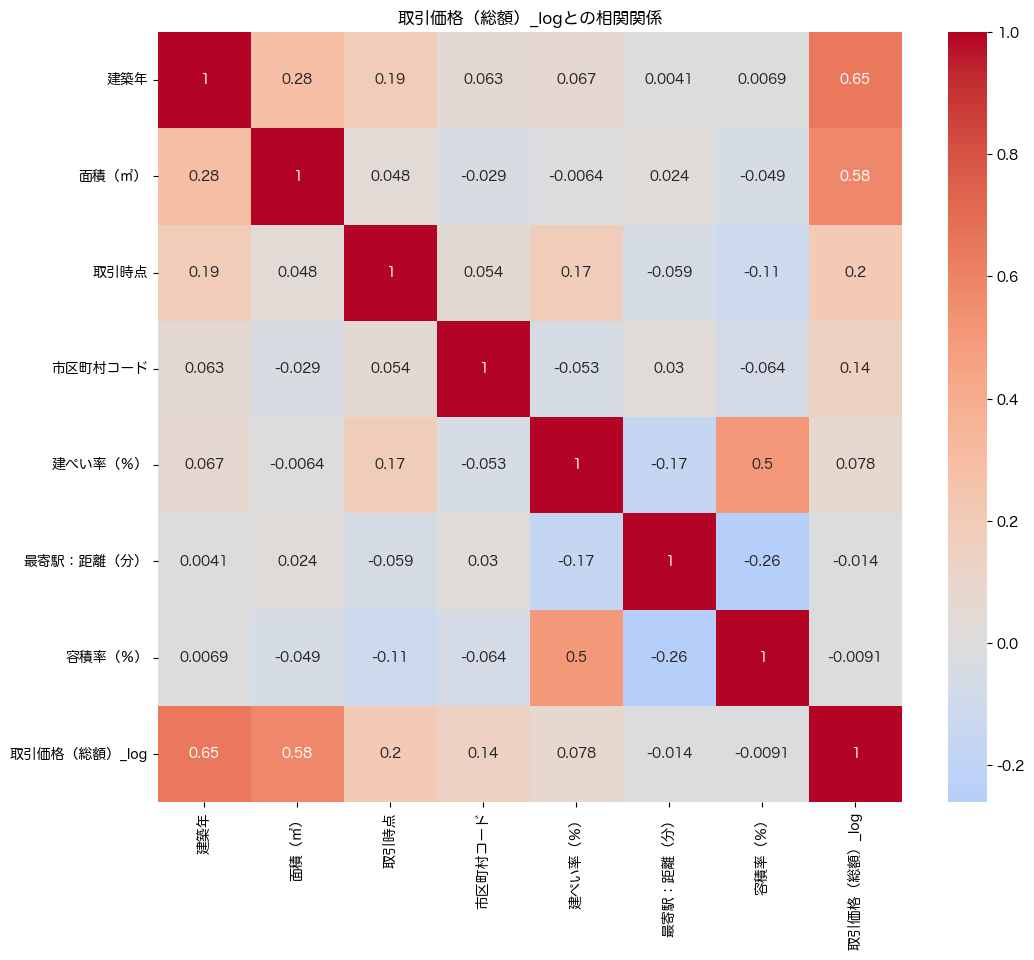

取引価格（総額）_log    1.000000
建築年             0.648189
面積（㎡）           0.581144
取引時点            0.203705
市区町村コード         0.142742
建ぺい率（％）         0.078466
容積率（％）         -0.009124
最寄駅：距離（分）      -0.013627
Name: 取引価格（総額）_log, dtype: float64


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_transaction_date.csv'
df = pd.read_csv(data_path, low_memory=False)

numeric_df = df.select_dtypes(include=[ 'int64', 'float64'])

# 相関行列の計算
corr_matrix = numeric_df.corr()

# SalePriceとの相関が高い上位20の特徴量を抽出
top_features = corr_matrix['取引価格（総額）_log'].abs().sort_values(ascending=False).index.tolist()
top_features.remove('取引価格（総額）_log')  # SalePrice自体は除外

# 選択した特徴量のみで再び相関行列を計算
top_corr_matrix = df[top_features + ['取引価格（総額）_log']].corr()

# ヒートマップの作成
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('取引価格（総額）_logとの相関関係')
plt.show()

corr_with_saleprice = corr_matrix['取引価格（総額）_log'].sort_values(ascending = False)
print(corr_with_saleprice)

## 取引価格（総額）_logの基本的な統計情報を確認し、異常値の有無を確認

count    18569.000000
mean         7.101887
std          0.376886
min          5.000000
25%          6.929419
50%          7.176091
75%          7.361728
max          9.113943
Name: 取引価格（総額）_log, dtype: float64
異常値の数: 790
       市区町村コード  最寄駅：距離（分）   間取り  面積（㎡）   建築年 建物の構造  都市計画  建ぺい率（％）  容積率（％）  \
33       41201       15.0   １ＤＫ     25  1987    ＲＣ    商業     80.0   400.0   
72       41201        5.0  ３ＬＤＫ     95  2000   ＳＲＣ    商業     80.0   500.0   
162      41201       14.0   １ＤＫ     20  1987    ＲＣ    商業     80.0   400.0   
397      41201       45.0  ４ＬＤＫ     95  1999    ＲＣ  １中住専     60.0   200.0   
402      41201        8.0   １ＤＫ     25  1984   鉄骨造    商業     80.0   400.0   
...        ...        ...   ...    ...   ...   ...   ...      ...     ...   
17769    47201       10.0  ３ＬＤＫ     50  1984    ＲＣ  １低住専     50.0   100.0   
17897    47201       45.0  ３ＬＤＫ     60  1993    ＲＣ  １中住専     60.0   200.0   
17943    47201       16.0    １Ｋ     15  1975   ＳＲＣ  ２種住居     60.0   200.0   
18008   

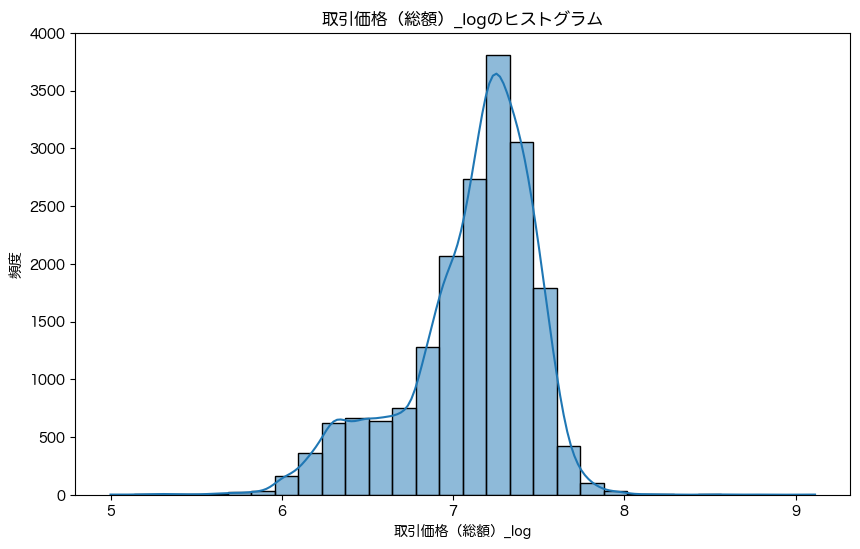

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_transaction_date.csv'
df = pd.read_csv(data_path, low_memory=False)

# '取引価格（総額）_log'の統計情報を確認
saleprice_log_stats = df['取引価格（総額）_log'].describe()
print(saleprice_log_stats)

# 異常値の確認
Q1 = df['取引価格（総額）_log'].quantile(0.25)
Q3 = df['取引価格（総額）_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['取引価格（総額）_log'] < lower_bound) | (df['取引価格（総額）_log'] > upper_bound)]
print(f"異常値の数: {len(outliers)}")
print(outliers)

# ヒストグラムの可視化
plt.figure(figsize=(10, 6))
sns.histplot(df['取引価格（総額）_log'], bins=30, kde=True)
plt.title('取引価格（総額）_logのヒストグラム')
plt.xlabel('取引価格（総額）_log')
plt.ylabel('頻度')
plt.show()


## 取引価格_logの異常値を削除する

削除後のデータの行数: 17779


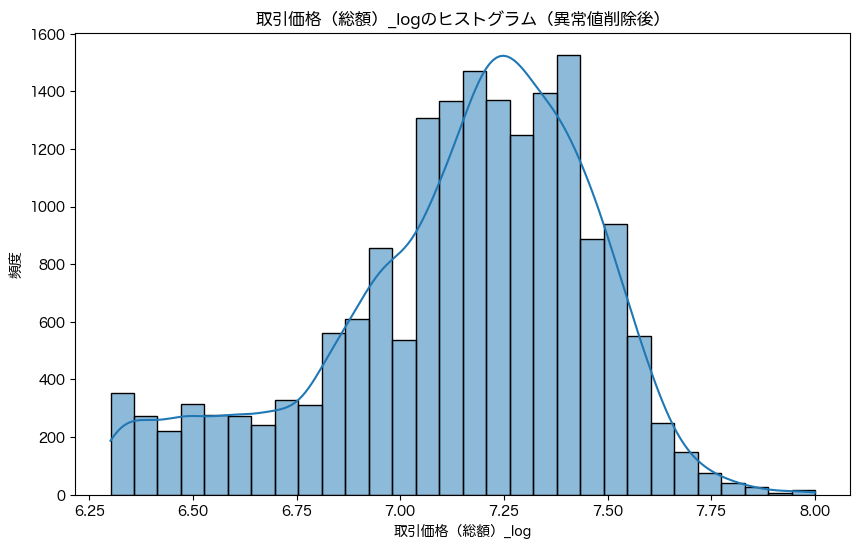

異常値削除後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_log.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_transaction_date.csv'
df = pd.read_csv(data_path, low_memory=False)

# 異常値の確認
Q1 = df['取引価格（総額）_log'].quantile(0.25)
Q3 = df['取引価格（総額）_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値を削除
df_cleaned = df[(df['取引価格（総額）_log'] >= lower_bound) & (df['取引価格（総額）_log'] <= upper_bound)]

# 削除後のデータ数を確認
print(f"削除後のデータの行数: {len(df_cleaned)}")

# 削除後のヒストグラムを作成
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['取引価格（総額）_log'], bins=30, kde=True)
plt.title('取引価格（総額）_logのヒストグラム（異常値削除後）')
plt.xlabel('取引価格（総額）_log')
plt.ylabel('頻度')
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
output_path = os.path.join(save_dir, 'train_41_42_43_44_45_46_47_cleaned_log.csv')
train_data.to_csv(output_path, index=False)

print(f"異常値削除後のデータを保存しました: {output_path}")


## 最寄駅：距離（分）の外れ値の確認と処理

=== 最寄駅：距離（分）の統計情報（クリッピング前） ===
count    18569.000000
mean        23.073887
std         17.726610
min          0.000000
25%          9.000000
50%         18.000000
75%         45.000000
max        120.000000
Name: 最寄駅：距離（分）, dtype: float64
=== 最寄駅：距離（分）の統計情報（クリッピング後） ===
count    18569.000000
mean        23.021541
std         17.474437
min          0.000000
25%          9.000000
50%         18.000000
75%         45.000000
max         99.000000
Name: 最寄駅：距離（分）, dtype: float64


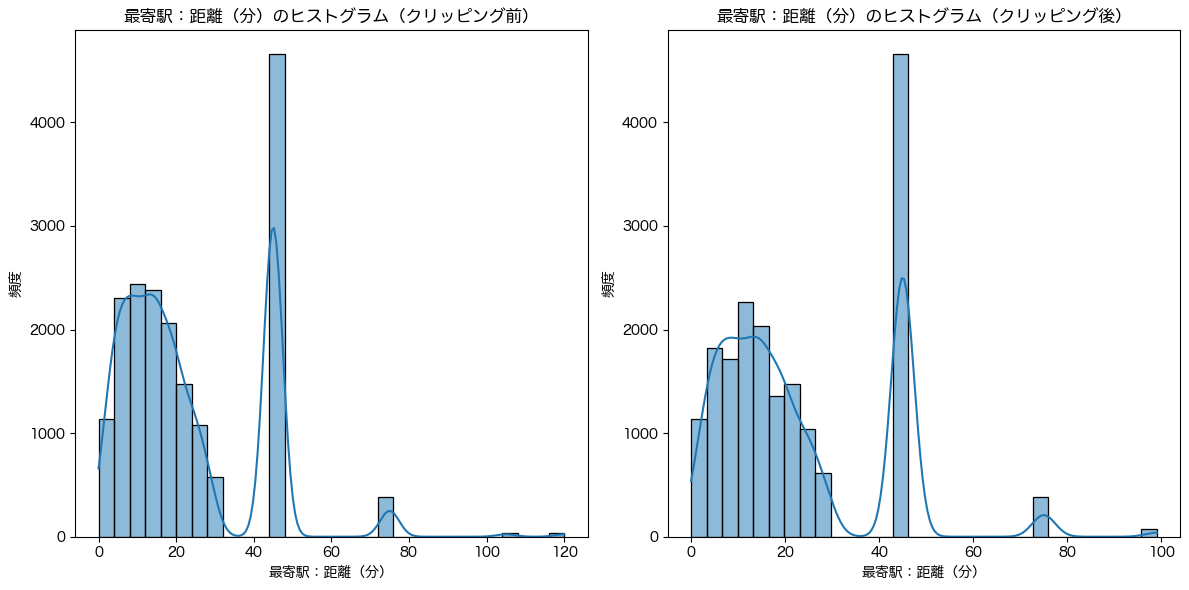

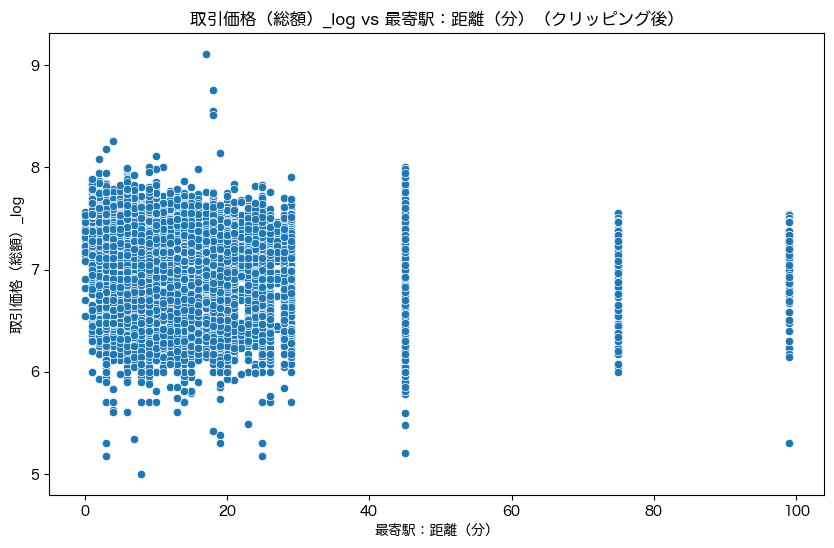

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_station.csv


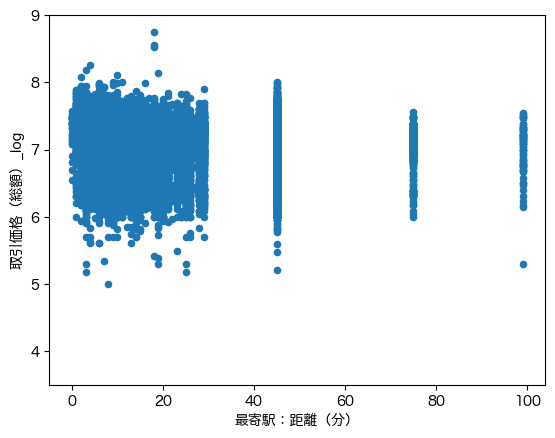

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_cleaned_log.csv'
df = pd.read_csv(data_path, low_memory=False)

# クリッピングの関数
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 統計情報の表示
    print(f'=== {column}の統計情報（クリッピング前） ===')
    print(df[column].describe())
    
    # クリッピングを実行
    df_clipped = df.copy()
    df_clipped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    # 統計情報の表示（クリッピング後）
    print(f'=== {column}の統計情報（クリッピング後） ===')
    print(df_clipped[column].describe())
    
    return df_clipped

# 最寄駅：距離（分）のクリッピングを実行
df_clipped = clip_outliers(df, '最寄駅：距離（分）')

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['最寄駅：距離（分）'], bins=30, kde=True)
plt.title('最寄駅：距離（分）のヒストグラム（クリッピング前）')
plt.xlabel('最寄駅：距離（分）')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df_clipped['最寄駅：距離（分）'], bins=30, kde=True)
plt.title('最寄駅：距離（分）のヒストグラム（クリッピング後）')
plt.xlabel('最寄駅：距離（分）')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# クリッピング後の散布図
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clipped, x='最寄駅：距離（分）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 最寄駅：距離（分）（クリッピング後）')
plt.xlabel('最寄駅：距離（分）')
plt.ylabel('取引価格（総額）_log')
plt.show()

# scatter plot 最寄駅/ 取引価格（総額）_log
var = '最寄駅：距離（分）'
data = pd.concat([df_clipped['取引価格（総額）_log'], df_clipped[var]], axis = 1)
data.plot.scatter(x = var, y = '取引価格（総額）_log', ylim = (3.5, 9.0));

# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_station.csv'
df_clipped.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")


## 最寄駅：距離（分）：特定の条件に合致するデータポイントを削除

            市区町村コード     最寄駅：距離（分）         面積（㎡）           建築年       建ぺい率（％）  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean   44453.622142     22.972225     67.889288   1996.951022     72.741579   
std     1847.969620     17.397096     23.228551     10.146793      9.819680   
min    41201.000000      0.000000     15.000000   1953.000000     40.000000   
25%    43101.000000      9.000000     60.000000   1991.000000     60.000000   
50%    44201.000000     18.000000     70.000000   1995.000000     80.000000   
75%    46201.000000     45.000000     80.000000   2005.000000     80.000000   
max    47362.000000     99.000000    710.000000   2022.000000     80.000000   

             容積率（％）           取引時点  取引価格（総額）_log  
count  18110.000000   18110.000000  18110.000000  
mean     268.300939  201627.012811      7.114031  
std      110.109765     492.642155      0.351652  
min       80.000000  200609.000000      5.903090  
25%      200.000000  201206.00000

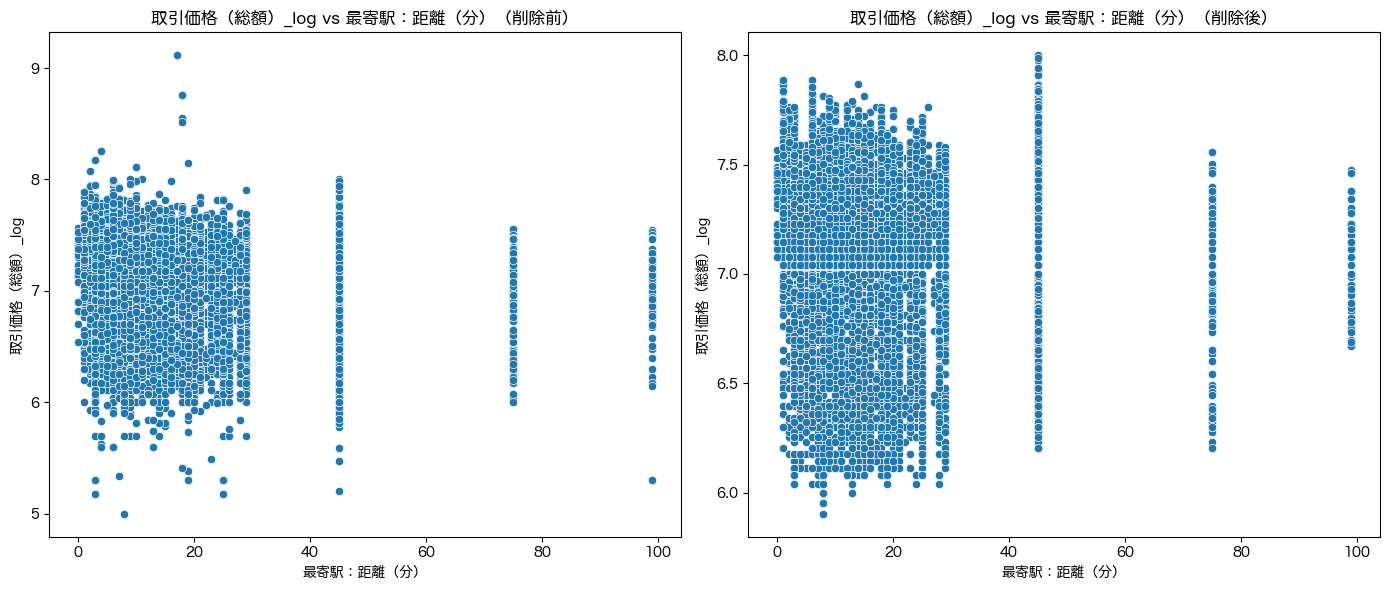

削除後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_station_specific_points.csv


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_station.csv'
df = pd.read_csv(data_path, low_memory=False)

# 特定の条件に合致するデータポイントを削除
# 各条件をリストとして定義
conditions = [
    (0, 0, 7.0, None),
    (1, 1, 6.1, None),
    (2, 3, 6.0, 7.8),
    (4, 5, 6.1, 7.6),
    (6, 6, 6.0, 7.9),
    (7, 7, 6.0, 7.7),
    (8, 8, 5.9, 7.9),
    (9, 9, 6.1, 7.9),
    (10, 10, 6.0, 7.8),
    (11, 11, 6.1, 7.7),
    (12, 12, 6.0, 7.9),
    (13, 13, 5.9, 7.9),
    (14, 19, 6.0, 7.9),
    (20, 20, 6.1, 7.8),
    (21, 21, 6.0, 7.6),
    (22, 22, 6.1, 7.6),
    (23, 25, 6.0, 7.8),
    (26, 26, 7.0, None),
    (27, 27, 6.0, None),
    (28, 28, 6.0, 7.6),
    (29, 29, 6.1, 7.6),
    (45, 50, 6.2, None),
    (70, 75, 6.2, None),
    (95, 100, 6.6, 7.5)
]

# フィルタリング処理
df_filtered = df.copy()

for min_dist, max_dist, min_log, max_log in conditions:
    if min_log is not None and max_log is not None:
        df_filtered = df_filtered[~((df_filtered['最寄駅：距離（分）'] >= min_dist) & 
                                    (df_filtered['最寄駅：距離（分）'] <= max_dist) &
                                    ((df_filtered['取引価格（総額）_log'] <= min_log) | 
                                     (df_filtered['取引価格（総額）_log'] >= max_log)))]
    elif min_log is None:
        df_filtered = df_filtered[~((df_filtered['最寄駅：距離（分）'] >= min_dist) & 
                                    (df_filtered['最寄駅：距離（分）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] >= max_log))]
    elif max_log is None:
        df_filtered = df_filtered[~((df_filtered['最寄駅：距離（分）'] >= min_dist) & 
                                    (df_filtered['最寄駅：距離（分）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] <= min_log))]

# 削除後のデータの統計情報を表示
print(df_filtered.describe())

# 削除前と削除後の散布図を比較
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='最寄駅：距離（分）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 最寄駅：距離（分）（削除前）')
plt.xlabel('最寄駅：距離（分）')
plt.ylabel('取引価格（総額）_log')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered, x='最寄駅：距離（分）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 最寄駅：距離（分）（削除後）')
plt.xlabel('最寄駅：距離（分）')
plt.ylabel('取引価格（総額）_log')

plt.tight_layout()
plt.show()

# 削除後のデータを保存
output_path_filtered = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_station_specific_points.csv'
df_filtered.to_csv(output_path_filtered, index=False)
print(f"削除後のデータを保存しました: {output_path_filtered}")


## 面積（㎡）の外れ値の確認と処理

=== 面積（㎡）の統計情報（クリッピング前） ===
count    18110.000000
mean        67.889288
std         23.228551
min         15.000000
25%         60.000000
50%         70.000000
75%         80.000000
max        710.000000
Name: 面積（㎡）, dtype: float64
=== 面積（㎡）の統計情報（クリッピング後） ===
count    18110.000000
mean        68.317228
std         19.022647
min         30.000000
25%         60.000000
50%         70.000000
75%         80.000000
max        110.000000
Name: 面積（㎡）, dtype: float64


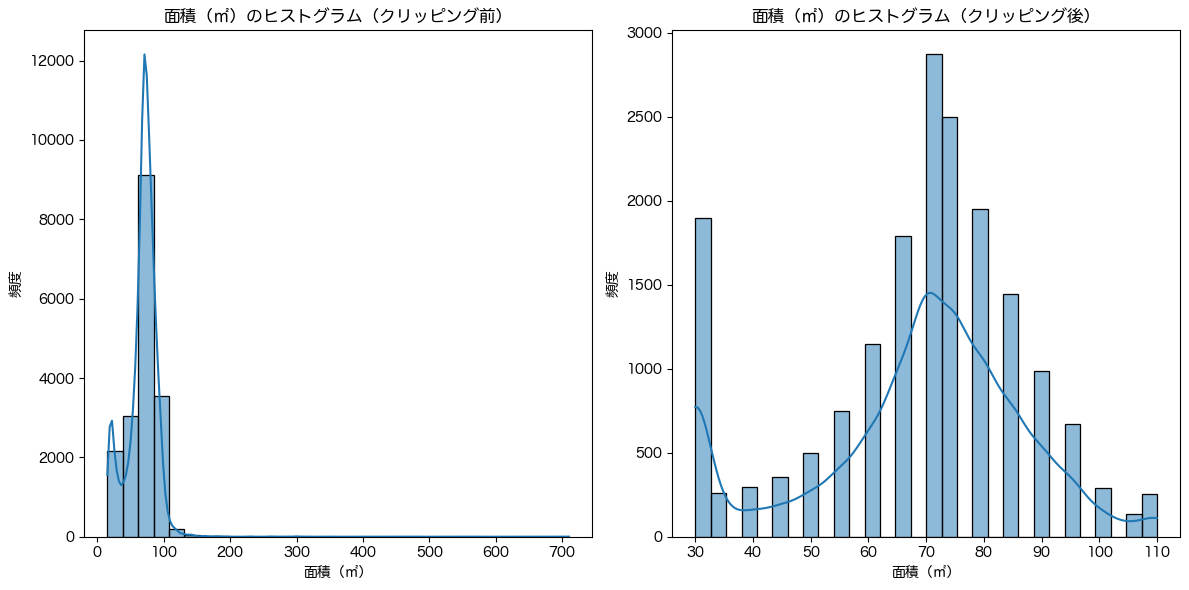

   市区町村コード  最寄駅：距離（分）     間取り  面積（㎡）   建築年 建物の構造  都市計画  建ぺい率（％）  容積率（％）  \
0    41201       25.0    ２ＬＤＫ     70  1991    ＲＣ  ２中住専     60.0   200.0   
1    41203       22.0    ３ＬＤＫ     75  1999    ＲＣ  １種住居     80.0   200.0   
2    41201        8.0  ３ＬＤＫ＋Ｓ     75  2001    ＲＣ  ２種住居     60.0   200.0   
3    41202        9.0    ３ＬＤＫ     65  1991   ＳＲＣ  １種住居     60.0   200.0   
4    41202       11.0    ３ＬＤＫ     75  2008    ＲＣ    商業     80.0   400.0   

     取引時点  取引価格（総額）_log  
0  202206      7.342423  
1  202206      7.079181  
2  201003      7.255273  
3  201906      7.113943  
4  200906      7.146128  


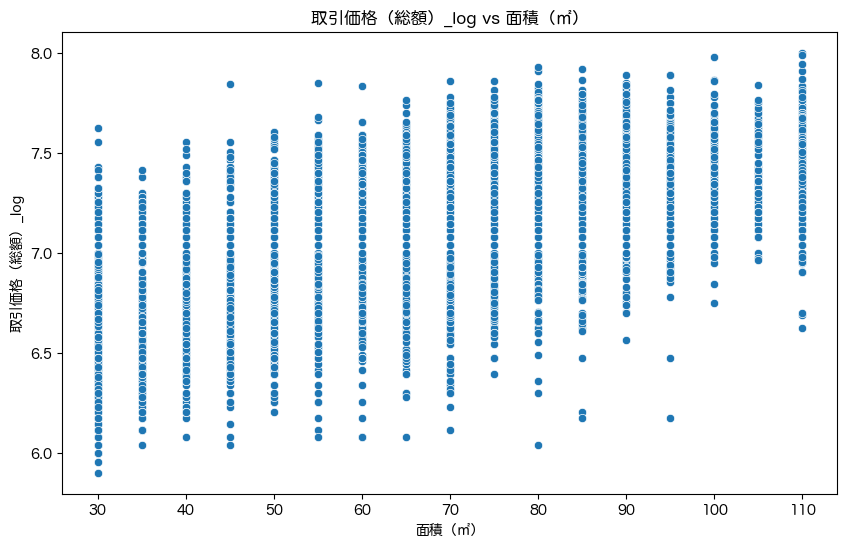

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_space.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_station_specific_points.csv'
df = pd.read_csv(data_path, low_memory=False)

# クリッピングの関数
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 統計情報の表示
    print(f'=== {column}の統計情報（クリッピング前） ===')
    print(df[column].describe())
    
    # クリッピングを実行
    df_clipped = df.copy()
    df_clipped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    # 統計情報の表示（クリッピング後）
    print(f'=== {column}の統計情報（クリッピング後） ===')
    print(df_clipped[column].describe())
    
    return df_clipped

# 面積（㎡）のクリッピングを実行
df_clipped = clip_outliers(df, '面積（㎡）')

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['面積（㎡）'], bins=30, kde=True)
plt.title('面積（㎡）のヒストグラム（クリッピング前）')
plt.xlabel('面積（㎡）')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df_clipped['面積（㎡）'], bins=30, kde=True)
plt.title('面積（㎡）のヒストグラム（クリッピング後）')
plt.xlabel('面積（㎡）')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# クリッピング後のデータの一部を表示して確認
print(df_clipped.head())

# 処理後のデータを確認するための散布図
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clipped, x='面積（㎡）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 面積（㎡）')
plt.xlabel('面積（㎡）')
plt.ylabel('取引価格（総額）_log')
plt.show()

# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_space.csv'
df_clipped.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")


## 面積：特定の条件に合致するデータポイントを削除

            市区町村コード     最寄駅：距離（分）         面積（㎡）           建築年       建ぺい率（％）  \
count  17731.000000  17731.000000  17731.000000  17731.000000  17731.000000   
mean   44427.939541     23.000902     68.348091   1996.835937     72.698663   
std     1837.819820     17.398692     19.067910      9.975672      9.832119   
min    41201.000000      0.000000     30.000000   1953.000000     40.000000   
25%    43101.000000     10.000000     60.000000   1991.000000     60.000000   
50%    44201.000000     18.000000     70.000000   1995.000000     80.000000   
75%    46201.000000     45.000000     80.000000   2005.000000     80.000000   
max    47362.000000     99.000000    110.000000   2022.000000     80.000000   

             容積率（％）           取引時点  取引価格（総額）_log  
count  17731.000000   17731.000000  17731.000000  
mean     267.854605  201622.789860      7.112784  
std      109.954867     492.701137      0.344599  
min       80.000000  200609.000000      5.903090  
25%      200.000000  201206.00000

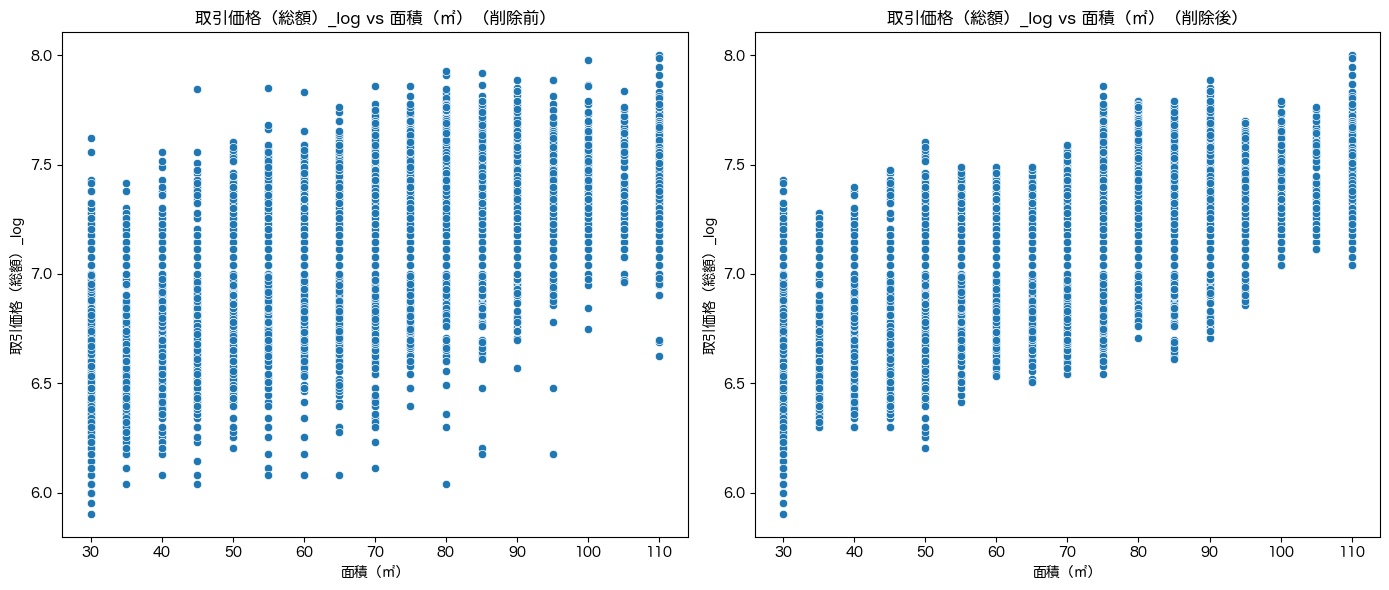

削除後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_space_specific_points.csv


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_space.csv'
df = pd.read_csv(data_path, low_memory=False)

# 特定の条件に合致するデータポイントを削除
# 各条件をリストとして定義
conditions = [
    (30, 30, None, 7.5),
    (35, 35, 6.3, 7.3),
    (40, 40, 6.3, 7.4),
    (45, 45, 6.3, 7.5),
    (55, 55, 6.4, 7.5),
    (60, 65, 6.5, 7.5),
    (70, 70, 6.5, 7.6),
    (75, 75, 6.5, None),
    (80, 80, 6.7, 7.8),
    (85, 85, 6.6, 7.8),
    (90, 90, 6.7, None),
    (95, 95, 6.8, 7.7),
    (100, 100, 7.0, 7.8),
    (105, 105, 7.1, 7.8),
    (110, 110, 7.0, None)
]

# フィルタリング処理
df_filtered = df.copy()

for min_dist, max_dist, min_log, max_log in conditions:
    if min_log is not None and max_log is not None:
        df_filtered = df_filtered[~((df_filtered['面積（㎡）'] >= min_dist) & 
                                    (df_filtered['面積（㎡）'] <= max_dist) &
                                    ((df_filtered['取引価格（総額）_log'] <= min_log) | 
                                     (df_filtered['取引価格（総額）_log'] >= max_log)))]
    elif min_log is None:
        df_filtered = df_filtered[~((df_filtered['面積（㎡）'] >= min_dist) & 
                                    (df_filtered['面積（㎡）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] >= max_log))]
    elif max_log is None:
        df_filtered = df_filtered[~((df_filtered['面積（㎡）'] >= min_dist) & 
                                    (df_filtered['面積（㎡）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] <= min_log))]

# 削除後のデータの統計情報を表示
print(df_filtered.describe())

# 削除前と削除後の散布図を比較
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='面積（㎡）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 面積（㎡）（削除前）')
plt.xlabel('面積（㎡）')
plt.ylabel('取引価格（総額）_log')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered, x='面積（㎡）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 面積（㎡）（削除後）')
plt.xlabel('面積（㎡）')
plt.ylabel('取引価格（総額）_log')

plt.tight_layout()
plt.show()

# 削除後のデータを保存
output_path_filtered = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_space_specific_points.csv'
df_filtered.to_csv(output_path_filtered, index=False)
print(f"削除後のデータを保存しました: {output_path_filtered}")


## 建築年の外れ値の確認と処理

=== 建築年の統計情報（クリッピング前） ===
count    17731.000000
mean      1996.835937
std          9.975672
min       1953.000000
25%       1991.000000
50%       1995.000000
75%       2005.000000
max       2022.000000
Name: 建築年, dtype: float64
=== 建築年の統計情報（クリッピング後） ===
count    17731.000000
mean      1996.837291
std          9.971142
min       1970.000000
25%       1991.000000
50%       1995.000000
75%       2005.000000
max       2022.000000
Name: 建築年, dtype: float64


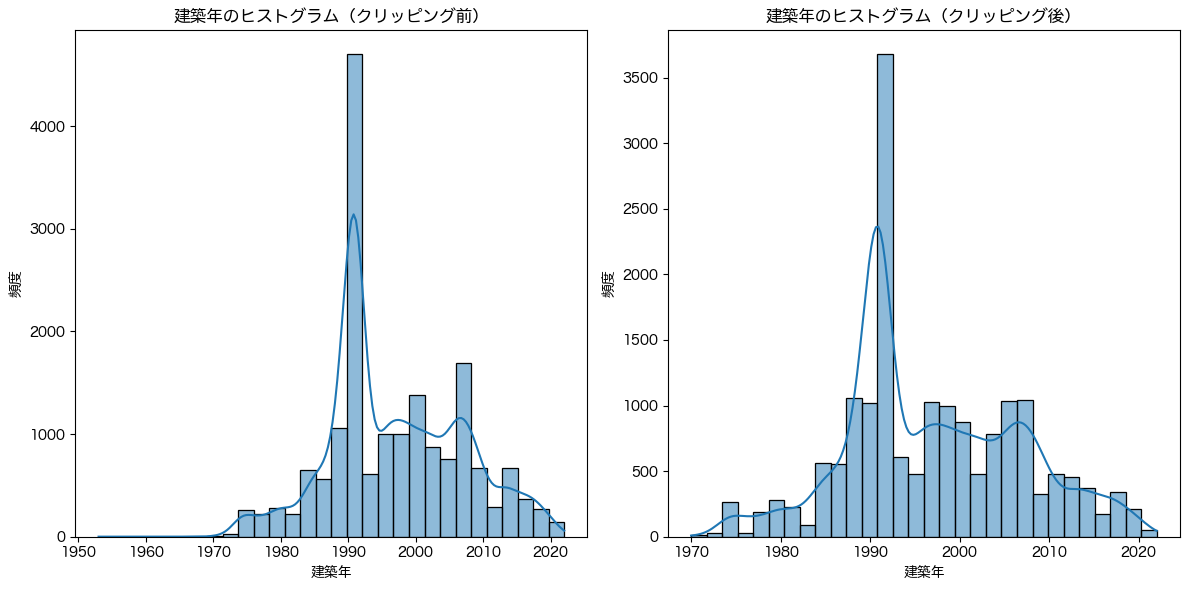

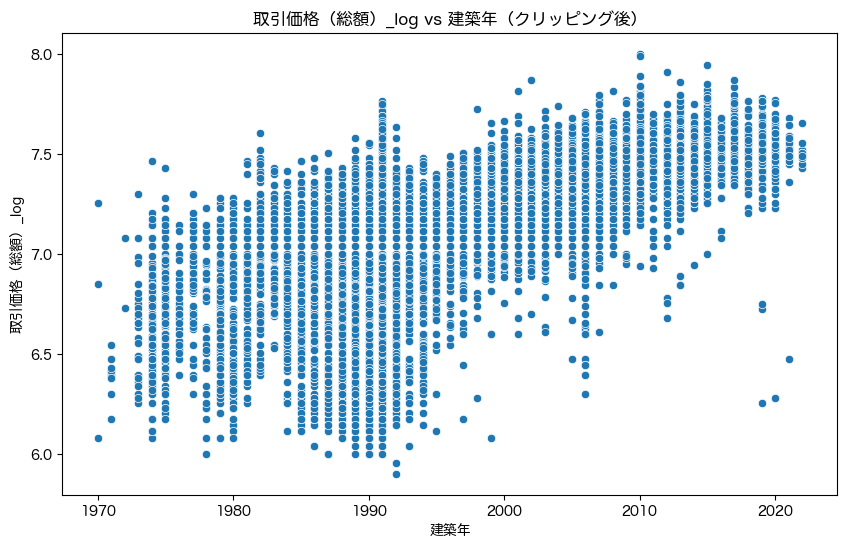

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_yearbuilt.csv


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_space_specific_points.csv'
df = pd.read_csv(data_path, low_memory=False)

# クリッピングの関数
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 統計情報の表示
    print(f'=== {column}の統計情報（クリッピング前） ===')
    print(df[column].describe())
    
    # クリッピングを実行
    df_clipped = df.copy()
    df_clipped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    # 統計情報の表示（クリッピング後）
    print(f'=== {column}の統計情報（クリッピング後） ===')
    print(df_clipped[column].describe())
    
    return df_clipped

# 建築年のクリッピングを実行
df_clipped = clip_outliers(df, '建築年')

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['建築年'], bins=30, kde=True)
plt.title('建築年のヒストグラム（クリッピング前）')
plt.xlabel('建築年')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df_clipped['建築年'], bins=30, kde=True)
plt.title('建築年のヒストグラム（クリッピング後）')
plt.xlabel('建築年')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# 処理後のデータを確認するための散布図
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clipped, x='建築年', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 建築年（クリッピング後）')
plt.xlabel('建築年')
plt.ylabel('取引価格（総額）_log')
plt.show()

# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_yearbuilt.csv'
df_clipped.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")


## 特定の条件にマッチするデータポイントを削除

            市区町村コード     最寄駅：距離（分）         面積（㎡）           建築年       建ぺい率（％）  \
count  17134.000000  17134.000000  17134.000000  17134.000000  17134.000000   
mean   44396.422727     23.071495     68.060289   1996.598459     72.586086   
std     1823.953560     17.342660     18.863493      9.825820      9.863099   
min    41201.000000      0.000000     30.000000   1970.000000     40.000000   
25%    43101.000000     10.000000     60.000000   1991.000000     60.000000   
50%    44201.000000     18.000000     70.000000   1995.000000     80.000000   
75%    46201.000000     45.000000     80.000000   2004.000000     80.000000   
max    47362.000000     99.000000    110.000000   2022.000000     80.000000   

             容積率（％）           取引時点  取引価格（総額）_log  
count  17134.000000   17134.000000  17134.000000  
mean     267.396988  201615.946014      7.104498  
std      109.718259     491.772877      0.336866  
min       80.000000  200609.000000      6.000000  
25%      200.000000  201206.00000

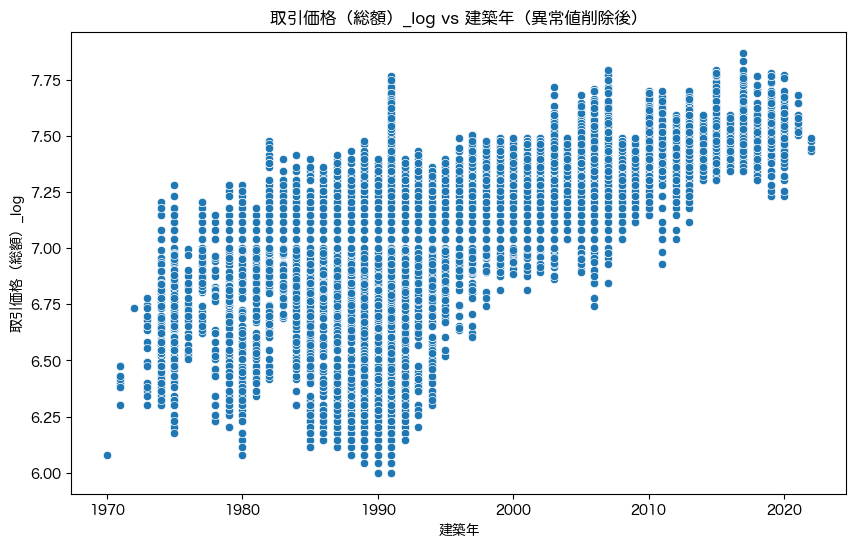

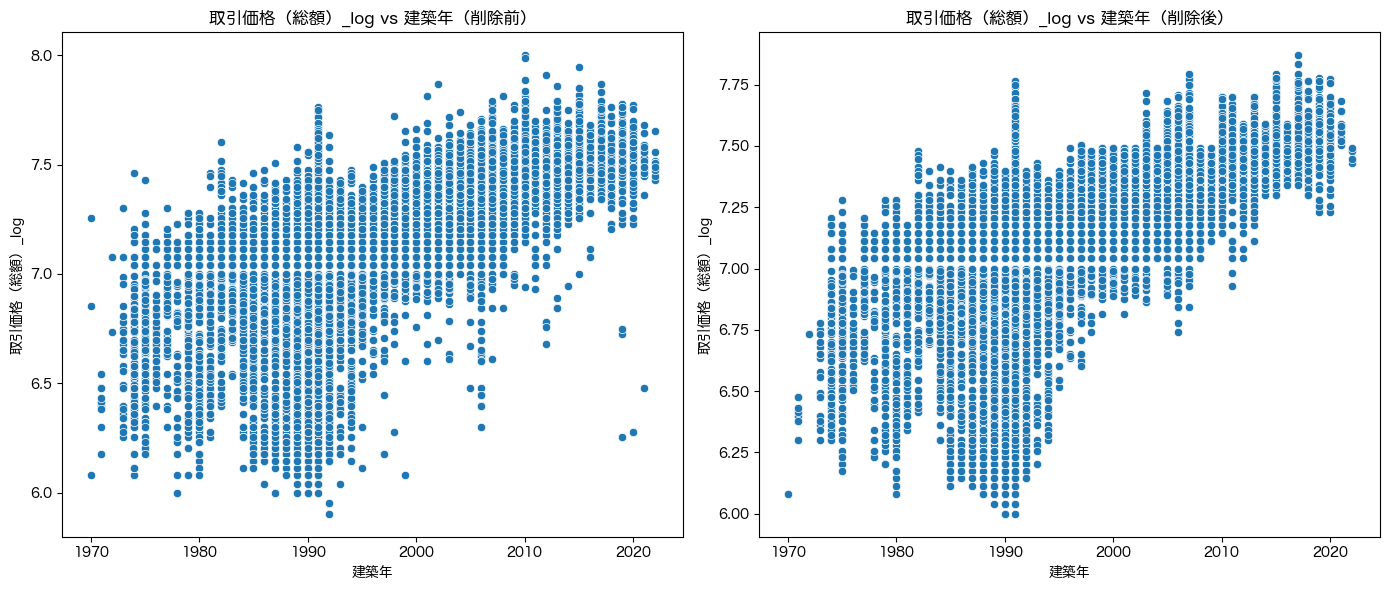

異常値削除後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_yearbuilt_specific_points.csv


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_yearbuilt.csv'
df = pd.read_csv(data_path, low_memory=False)

# 特定の条件に合致するデータポイントを削除
# 各条件をリストとして定義
conditions = [
    (1970, 1970, None, 6.5),
    (1971, 1971, 6.3, 6.5),
    (1972, 1972, None, 7.0),
    (1973, 1973, 6.3, 6.8),
    (1974, 1974, 6.3, 7.3),
    (1975, 1975, None, 7.3),
    (1976, 1976, 6.5, 7.0),
    (1977, 1977, 6.6, 7.3),
    (1978, 1978, 6.2, 7.2),
    (1979, 1979, 6.2, None),
    (1980, 1980, 6.0, None),
    (1981, 1981, 6.3, 7.2),
    (1982, 1982, 6.4, 7.5),
    (1983, 1983, 6.6, 7.4),
    (1984, 1984, 6.3, 7.5), 
    (1985, 1985, 6.1, 7.4),
    (1986, 1986, 6.1, 7.4),
    (1987, 1987, 6.0, 7.5),
    (1989, 1989, 6.0, 7.5),
    (1990, 1990, None, 7.4),
    (1992, 1992, 6.1, 7.4),
    (1993, 1993, 6.2, None),
    (1994, 1994, 6.3, 7.4),
    (1995, 1995, 6.5, None),
    (1996, 1997, 6.6, None),
    (1997, 1997, 6.6, None),
    (1998, 2002, 6.7, 7.5),
    (1999, 1999, 6.7, 7.5),
    (2000, 2000, 6.77, 7.5),
    (2003, 2003, 6.8, None),
    (2004, 2004, 7.0, 7.5),
    (2005, 2005, 6.8, None),
    (2006, 2006, 6.7, None),
    (2007, 2007, 6.8, None),
    (2008, 2008, 7.0, 7.5),
    (2009, 2009, 7.0, 7.5),
    (2010, 2010, 7.1, 7.7),
    (2012, 2012, 7.0, 7.6),
    (2013, 2013, 7.1, 7.7),
    (2014, 2014, 7.3, 7.6),
    (2015, 2015, 7.3, 7.8),
    (2016, 2016, 7.3, 7.6),
    (2017, 2018, 7.3, None),
    (2019, 2020, 7.2, None),
    (2021, 2021, 7.5, None),
    (2022, 2022, 7.3, 7.5)
]

# フィルタリング処理
df_filtered = df.copy()

for min_dist, max_dist, min_log, max_log in conditions:
    if min_log is not None and max_log is not None:
        df_filtered = df_filtered[~((df_filtered['建築年'] >= min_dist) & 
                                    (df_filtered['建築年'] <= max_dist) &
                                    ((df_filtered['取引価格（総額）_log'] <= min_log) | 
                                     (df_filtered['取引価格（総額）_log'] >= max_log)))]
    elif min_log is None:
        df_filtered = df_filtered[~((df_filtered['建築年'] >= min_dist) & 
                                    (df_filtered['建築年'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] >= max_log))]
    elif max_log is None:
        df_filtered = df_filtered[~((df_filtered['建築年'] >= min_dist) & 
                                    (df_filtered['建築年'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] <= min_log))]

# 削除後のデータの統計情報を表示
print(df_filtered.describe())

# プロット変数の定義
var = '建築年'

# 削除後のプロットを再作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='建築年', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 建築年（異常値削除後）')
plt.xlabel('建築年')
plt.ylabel('取引価格（総額）_log')
plt.show()



# 削除前と削除後の散布図を比較
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='建築年', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 建築年（削除前）')
plt.xlabel('建築年')
plt.ylabel('取引価格（総額）_log')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered, x='建築年', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 建築年（削除後）')
plt.xlabel('建築年')
plt.ylabel('取引価格（総額）_log')

plt.tight_layout()
plt.show()

# 削除後のデータを保存
output_path_filtered = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_yearbuilt_specific_points.csv'
df_filtered.to_csv(output_path_filtered, index=False)
print(f"異常値削除後のデータを保存しました: {output_path_filtered}")


## 建ぺい率の外れ値の確認と処理

=== 建ぺい率（％）の統計情報（クリッピング前） ===
count    17134.000000
mean        72.586086
std          9.863099
min         40.000000
25%         60.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: 建ぺい率（％）, dtype: float64
=== 建ぺい率（％）の統計情報（クリッピング後） ===
count    17134.000000
mean        72.586086
std          9.863099
min         40.000000
25%         60.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: 建ぺい率（％）, dtype: float64


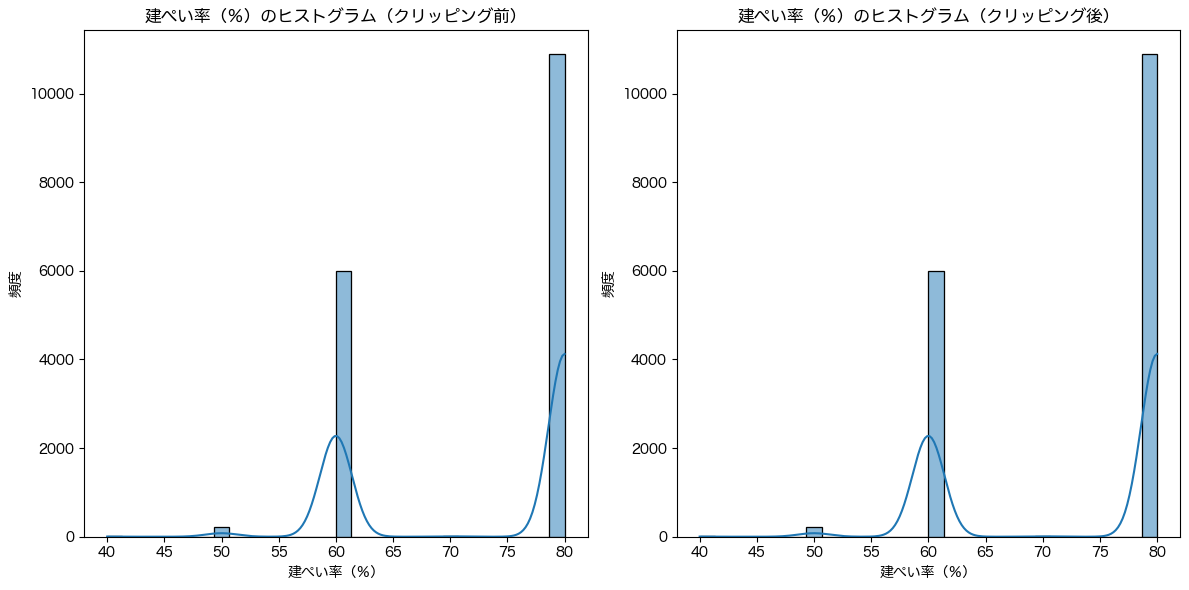

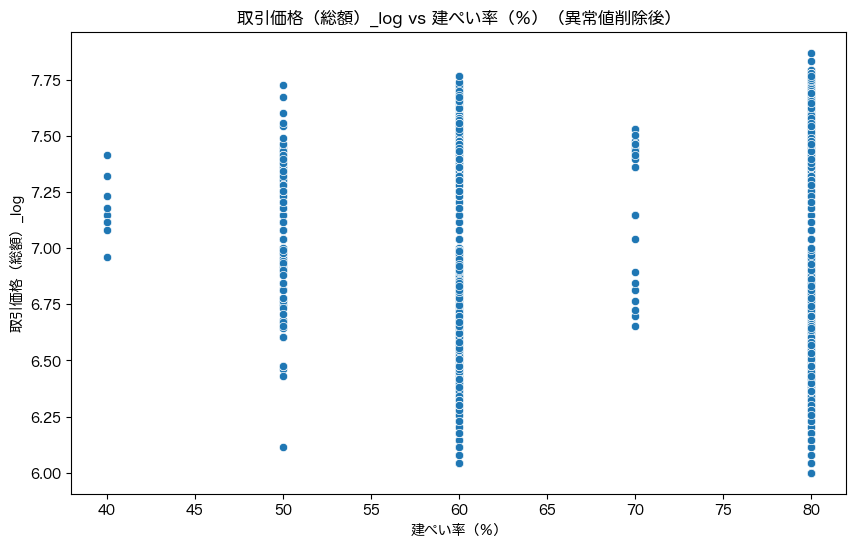

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_bcr.csv


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_yearbuilt_specific_points.csv'
df = pd.read_csv(data_path, low_memory=False)

# クリッピングの関数
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 統計情報の表示
    print(f'=== {column}の統計情報（クリッピング前） ===')
    print(df[column].describe())

    # クリッピングを実行
    df_clipped = df.copy()
    df_clipped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    # 統計情報の表示（クリッピング後）
    print(f'=== {column}の統計情報（クリッピング後） ===')
    print(df_clipped[column].describe())
    
    return df_clipped

# 建ぺい率（％）のクリッピングを実行
df_clipped = clip_outliers(df, '建ぺい率（％）')

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['建ぺい率（％）'], bins=30, kde=True)
plt.title('建ぺい率（％）のヒストグラム（クリッピング前）')
plt.xlabel('建ぺい率（％）')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df_clipped['建ぺい率（％）'], bins=30, kde=True)
plt.title('建ぺい率（％）のヒストグラム（クリッピング後）')
plt.xlabel('建ぺい率（％）')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# プロット変数の定義
var = '建ぺい率（％）'

# 削除後のプロットを再作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clipped, x='建ぺい率（％）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 建ぺい率（％）（異常値削除後）')
plt.xlabel('建ぺい率（％）')
plt.ylabel('取引価格（総額）_log')
plt.show()

# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_bcr.csv'
df_clipped.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")


## 特定の条件にマッチするデータポイントを削除
該当しない場合は次の処置に進む

            市区町村コード     最寄駅：距離（分）         面積（㎡）           建築年       建ぺい率（％）  \
count  17121.000000  17121.000000  17121.000000  17121.000000  17121.000000   
mean   44394.946907     23.060803     68.063781   1996.598855     72.604988   
std     1823.330918     17.338732     18.853553      9.819495      9.842265   
min    41201.000000      0.000000     30.000000   1970.000000     40.000000   
25%    43101.000000     10.000000     60.000000   1991.000000     60.000000   
50%    44201.000000     18.000000     70.000000   1995.000000     80.000000   
75%    46201.000000     45.000000     80.000000   2004.000000     80.000000   
max    47362.000000     99.000000    110.000000   2022.000000     80.000000   

             容積率（％）           取引時点  取引価格（総額）_log  
count  17121.000000   17121.000000  17121.000000  
mean     267.511828  201615.960283      7.104534  
std      109.676724     491.806278      0.336634  
min       80.000000  200609.000000      6.000000  
25%      200.000000  201206.00000

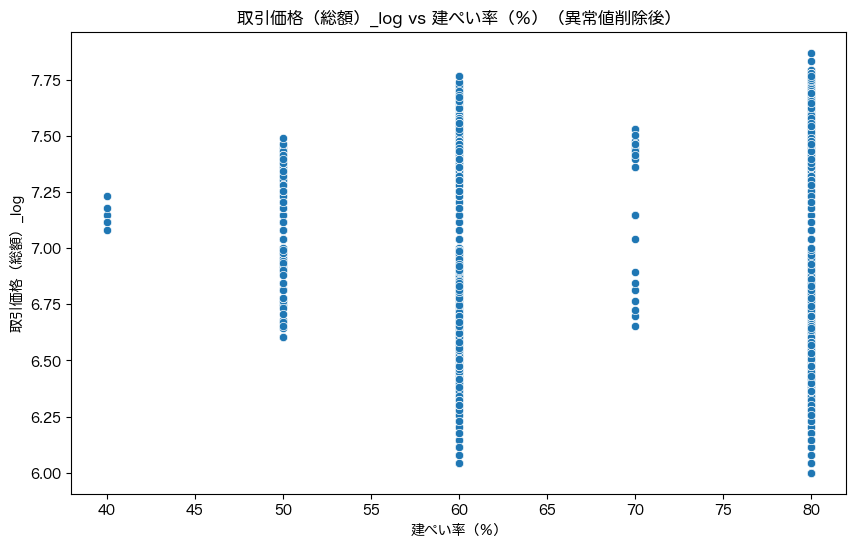

異常値削除後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_bcr_specific_points.csv


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_bcr.csv'
df = pd.read_csv(data_path, low_memory=False)

# 特定の条件に合致するデータポイントを削除
# 各条件をリストとして定義
conditions = [
    (40, 40, 7.0, 7.25),
    (50, 50, 6.5, 7.5)
]

# フィルタリング処理
df_filtered = df.copy()

for min_dist, max_dist, min_log, max_log in conditions:
    if min_log is not None and max_log is not None:
        df_filtered = df_filtered[~((df_filtered['建ぺい率（％）'] >= min_dist) & 
                                    (df_filtered['建ぺい率（％）'] <= max_dist) &
                                    ((df_filtered['取引価格（総額）_log'] <= min_log) | 
                                     (df_filtered['取引価格（総額）_log'] >= max_log)))]
    elif min_log is None:
        df_filtered = df_filtered[~((df_filtered['建ぺい率（％）'] >= min_dist) & 
                                    (df_filtered['建ぺい率（％）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] >= max_log))]
    elif max_log is None:
        df_filtered = df_filtered[~((df_filtered['建ぺい率（％）'] >= min_dist) & 
                                    (df_filtered['建ぺい率（％）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] <= min_log))]

# 削除後のデータの統計情報を表示
print(df_filtered.describe())

# プロット変数の定義
var = '建ぺい率（％）'

# 削除後のプロットを再作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='建ぺい率（％）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 建ぺい率（％）（異常値削除後）')
plt.xlabel('建ぺい率（％）')
plt.ylabel('取引価格（総額）_log')
plt.show()

# 削除後のデータを保存
output_path_filtered = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_bcr_specific_points.csv'
df_filtered.to_csv(output_path_filtered, index=False)
print(f"異常値削除後のデータを保存しました: {output_path_filtered}")


## 容積率の外れ値の確認と処理

=== 容積率（％）の統計情報（クリッピング前） ===
count    17121.000000
mean       267.511828
std        109.676724
min         80.000000
25%        200.000000
50%        200.000000
75%        400.000000
max        900.000000
Name: 容積率（％）, dtype: float64
=== 容積率（％）の統計情報（クリッピング後） ===
count    17121.000000
mean       267.354127
std        108.959164
min         80.000000
25%        200.000000
50%        200.000000
75%        400.000000
max        700.000000
Name: 容積率（％）, dtype: float64


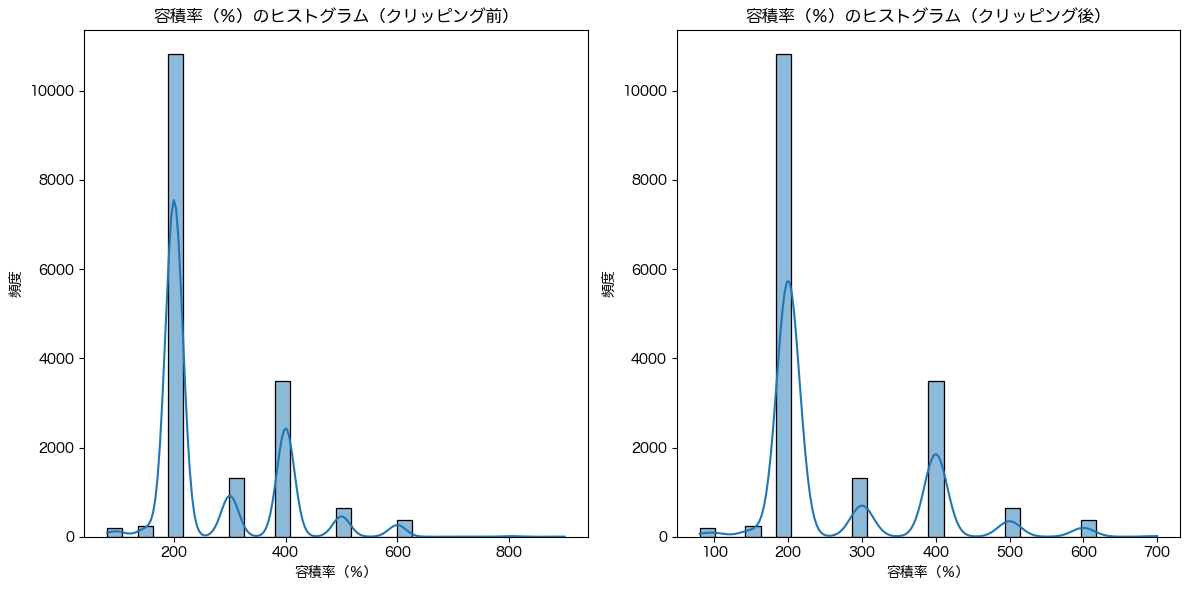

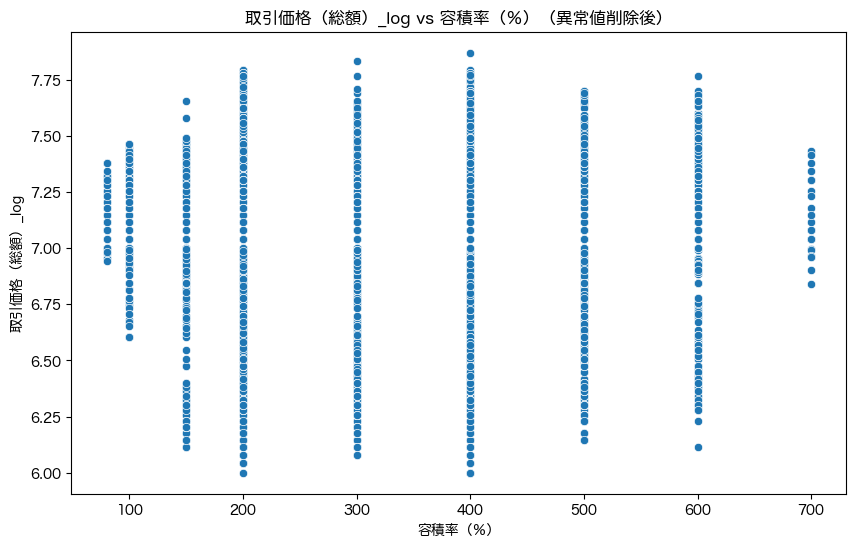

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_far.csv


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_bcr_specific_points.csv'
df = pd.read_csv(data_path, low_memory=False)

# クリッピングの関数
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 統計情報の表示
    print(f'=== {column}の統計情報（クリッピング前） ===')
    print(df[column].describe())

    # クリッピングを実行
    df_clipped = df.copy()
    df_clipped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    # 統計情報の表示（クリッピング後）
    print(f'=== {column}の統計情報（クリッピング後） ===')
    print(df_clipped[column].describe())
    
    return df_clipped

# 容積率（％）のクリッピングを実行
df_clipped = clip_outliers(df, '容積率（％）')

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['容積率（％）'], bins=30, kde=True)
plt.title('容積率（％）のヒストグラム（クリッピング前）')
plt.xlabel('容積率（％）')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df_clipped['容積率（％）'], bins=30, kde=True)
plt.title('容積率（％）のヒストグラム（クリッピング後）')
plt.xlabel('容積率（％）')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# クリッピング後の散布図をプロット
var = '容積率（％）'

# 削除後のプロットを再作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clipped, x='容積率（％）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 容積率（％）（異常値削除後）')
plt.xlabel('容積率（％）')
plt.ylabel('取引価格（総額）_log')
plt.show()

# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_far.csv'
df_clipped.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")


## 特定の条件にマッチするデータポイントを削除
該当する場合は処置をする

            市区町村コード     最寄駅：距離（分）         面積（㎡）           建築年       建ぺい率（％）  \
count  17031.000000  17031.000000  17031.000000  17031.000000  17031.000000   
mean   44396.217603     23.100053     68.185661   1996.646351     72.568258   
std     1824.639049     17.362224     18.761862      9.780585      9.852895   
min    41201.000000      0.000000     30.000000   1970.000000     40.000000   
25%    43101.000000     10.000000     60.000000   1991.000000     60.000000   
50%    44201.000000     18.000000     70.000000   1995.000000     80.000000   
75%    46201.000000     45.000000     80.000000   2004.000000     80.000000   
max    47362.000000     99.000000    110.000000   2022.000000     80.000000   

             容積率（％）           取引時点  取引価格（総額）_log  
count  17031.000000   17031.000000  17031.000000  
mean     265.831131  201616.531619      7.106779  
std      106.978524     491.849986      0.334206  
min       80.000000  200609.000000      6.000000  
25%      200.000000  201206.00000

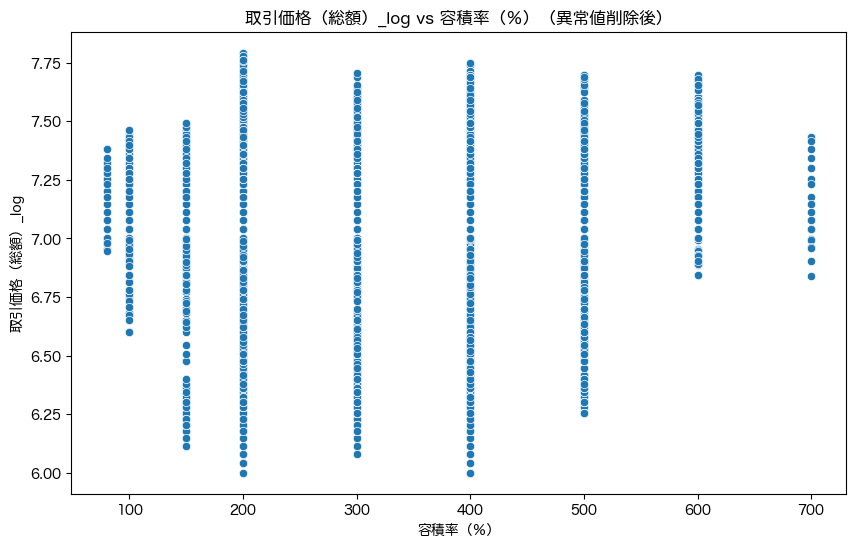

異常値削除後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_far_specific_points.csv


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_far.csv'
df = pd.read_csv(data_path, low_memory=False)


# 特定の条件に合致するデータポイントを削除
# 各条件をリストとして定義
conditions = [
    (150, 150, None, 7.5),
    (300, 300, None, 7.75),
    (400, 400, None, 7.75),
    (500, 500, 6.25, None),
    (600, 600, 6.8, 7.7)
]

# フィルタリング処理
df_filtered = df.copy()

for min_dist, max_dist, min_log, max_log in conditions:
    if min_log is not None and max_log is not None:
        df_filtered = df_filtered[~((df_filtered['容積率（％）'] >= min_dist) & 
                                    (df_filtered['容積率（％）'] <= max_dist) &
                                    ((df_filtered['取引価格（総額）_log'] <= min_log) | 
                                     (df_filtered['取引価格（総額）_log'] >= max_log)))]
    elif min_log is None:
        df_filtered = df_filtered[~((df_filtered['容積率（％）'] >= min_dist) & 
                                    (df_filtered['容積率（％）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] >= max_log))]
    elif max_log is None:
        df_filtered = df_filtered[~((df_filtered['容積率（％）'] >= min_dist) & 
                                    (df_filtered['容積率（％）'] <= max_dist) &
                                    (df_filtered['取引価格（総額）_log'] <= min_log))]

# 削除後のデータの統計情報を表示
print(df_filtered.describe())

# プロット変数の定義
var = '容積率（％）'

# 削除後のプロットを再作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='容積率（％）', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 容積率（％）（異常値削除後）')
plt.xlabel('容積率（％）')
plt.ylabel('取引価格（総額）_log')
plt.show()

# 削除後のデータを保存
output_path_filtered = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_far_specific_points.csv'
df_filtered.to_csv(output_path_filtered, index=False)
print(f"異常値削除後のデータを保存しました: {output_path_filtered}")


## 取引時点の外れ値の確認と処理

=== 取引時点の統計情報（クリッピング前） ===
count     17031.000000
mean     201616.531619
std         491.849986
min      200609.000000
25%      201206.000000
50%      201703.000000
75%      202106.000000
max      202306.000000
Name: 取引時点, dtype: float64
=== 取引時点の統計情報（クリッピング後） ===
count     17031.000000
mean     201616.531619
std         491.849986
min      200609.000000
25%      201206.000000
50%      201703.000000
75%      202106.000000
max      202306.000000
Name: 取引時点, dtype: float64


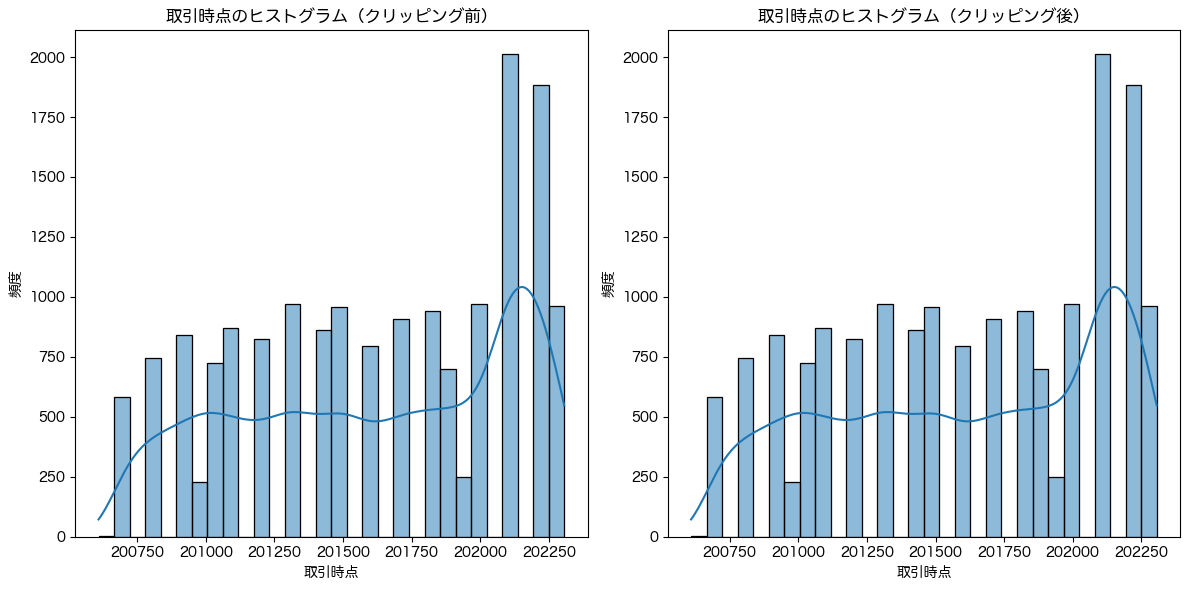

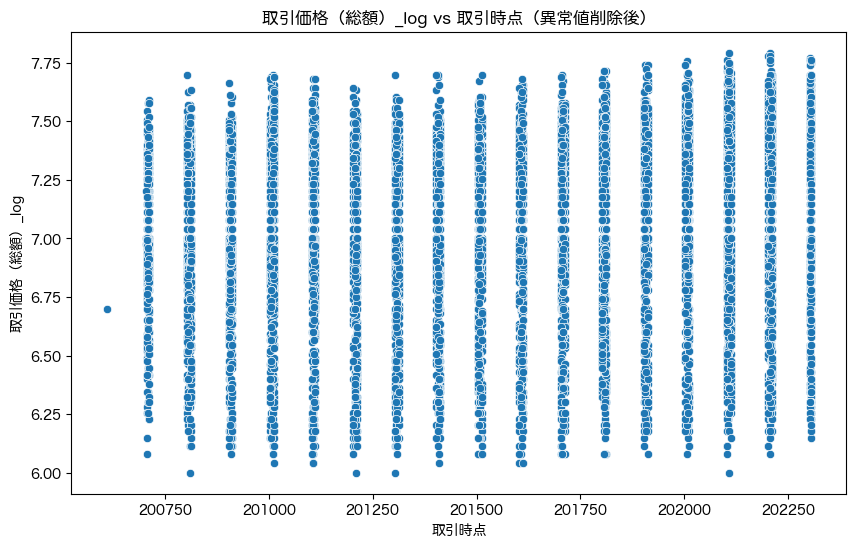

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_transaction_date.csv


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データセットのロード
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_filtered_far_specific_points.csv'
df = pd.read_csv(data_path, low_memory=False)

# '取引時点'を数値型に変換
df['取引時点'] = df['取引時点'].astype(int)

# クリッピングの関数
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 統計情報の表示
    print(f'=== {column}の統計情報（クリッピング前） ===')
    print(df[column].describe())

    # クリッピングを実行
    df_clipped = df.copy()
    df_clipped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    # 統計情報の表示（クリッピング後）
    print(f'=== {column}の統計情報（クリッピング後） ===')
    print(df_clipped[column].describe())
    
    return df_clipped

# 取引時点のクリッピングを実行
df_clipped = clip_outliers(df, '取引時点')

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['取引時点'], bins=30, kde=True)
plt.title('取引時点のヒストグラム（クリッピング前）')
plt.xlabel('取引時点')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df_clipped['取引時点'], bins=30, kde=True)
plt.title('取引時点のヒストグラム（クリッピング後）')
plt.xlabel('取引時点')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# scatter plot 取引時点/ 取引価格（総額）_log
var = '取引時点'

# 削除後のプロットを再作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clipped, x='取引時点', y='取引価格（総額）_log')
plt.title('取引価格（総額）_log vs 取引時点（異常値削除後）')
plt.xlabel('取引時点')
plt.ylabel('取引価格（総額）_log')
plt.show()


# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_transaction_date.csv'
df_clipped.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")


# headを確認する

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

# トレインデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_clipped_outliers_transaction_date.csv'
train_data = pd.read_csv(data_path, low_memory=False)

train_data.head()


,市区町村コード,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,都市計画,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
0,41201,25.0,２ＬＤＫ,70,1991,ＲＣ,２中住専,60.0,200.0,202206,7.342423
1,41203,22.0,３ＬＤＫ,75,1999,ＲＣ,１種住居,80.0,200.0,202206,7.079181
2,41201,8.0,３ＬＤＫ＋Ｓ,75,2001,ＲＣ,２種住居,60.0,200.0,201003,7.255273
3,41202,9.0,３ＬＤＫ,65,1991,ＳＲＣ,１種住居,60.0,200.0,201906,7.113943
4,41202,11.0,３ＬＤＫ,75,2008,ＲＣ,商業,80.0,400.0,200906,7.146128
